In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import numpy as np

warnings.filterwarnings('ignore')

## Reading csv

In [67]:
train_file = pd.read_csv(r'C:\Users\kande\Documents\HR_analytics\train_hr.csv')
test_file = pd.read_csv(r'C:\Users\kande\Documents\HR_analytics\test_hr.csv')

# Add is_promoted in test file
test_file['is_promoted']=np.nan

In [68]:
train_file.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [69]:
train_file.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [109]:
test_file.head()
final_test = test_file.copy()

In [71]:
test_file.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [72]:
# See number of datapoints and features 
train_file.shape

(54808, 14)

In [73]:
test_file.shape

(23490, 14)

In [74]:
train_file.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [75]:
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [76]:
test_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 14 columns):
employee_id             23490 non-null int64
department              23490 non-null object
region                  23490 non-null object
education               22456 non-null object
gender                  23490 non-null object
recruitment_channel     23490 non-null object
no_of_trainings         23490 non-null int64
age                     23490 non-null int64
previous_year_rating    21678 non-null float64
length_of_service       23490 non-null int64
KPIs_met >80%           23490 non-null int64
awards_won?             23490 non-null int64
avg_training_score      23490 non-null int64
is_promoted             0 non-null float64
dtypes: float64(2), int64(7), object(5)
memory usage: 2.5+ MB


In [77]:
# Education have few NaN values.

train_file['education'].replace(np.nan,"Bachelor's",inplace=True)
test_file['education'].replace(np.nan,"Bachelor's",inplace=True)

In [78]:
# Converting education to easy categorical values

train_file['education'].replace("Master's & above",3,inplace=True)
train_file['education'].replace("Bachelor's",2,inplace=True)
train_file['education'].replace("Below Secondary",1,inplace=True)

#same for test as well
test_file['education'].replace("Master's & above",3,inplace=True)
test_file['education'].replace("Bachelor's",2,inplace=True)
test_file['education'].replace("Below Secondary",1,inplace=True)

In [79]:
# previous_year_rating is also having mising values
# Replace with mean value
train_file['previous_year_rating'].replace(np.nan,3.0,inplace=True)
test_file['previous_year_rating'].replace(np.nan,3.0,inplace=True)

In [80]:
train_file['gender'].replace('f',0,inplace=True)
test_file['gender'].replace('f',0,inplace=True)

train_file['gender'].replace('m',1,inplace=True)
test_file['gender'].replace('m',1,inplace=True)

train_file['recruitment_channel'].replace('sourcing',0,inplace=True)
test_file['recruitment_channel'].replace('sourcing',0,inplace=True)

train_file['recruitment_channel'].replace('referred',1,inplace=True)
test_file['recruitment_channel'].replace('referred',1,inplace=True)

train_file['recruitment_channel'].replace('other',2,inplace=True)
test_file['recruitment_channel'].replace('other',2,inplace=True)


In [107]:
# Creating dummies
train_file['region'] = train_file['region'].str.replace('region_','')
train_file_dummies = pd.get_dummies(train_file, columns= ['department','region','education','recruitment_channel'] )

test_file['region'] = test_file['region'].str.replace('region_','')
test_file = pd.get_dummies(test_file, columns= ['department','region','education','recruitment_channel'] )

train_file_dummies.head()

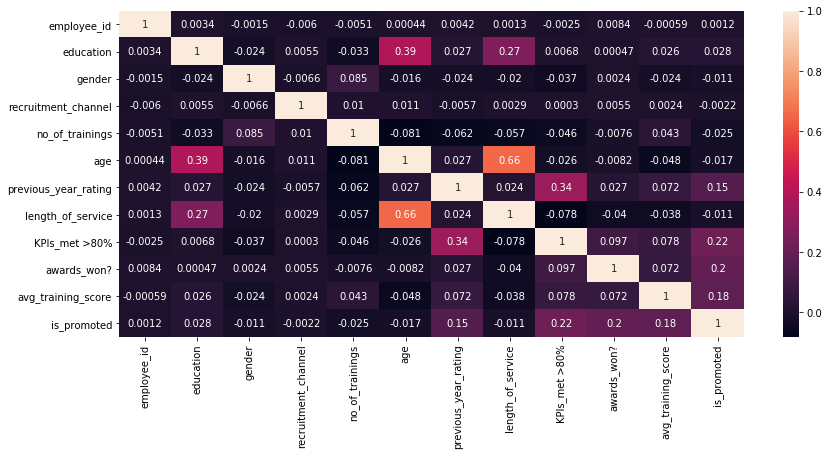

In [89]:
# Vizualizing correlation matrix in heatmap
plt.figure(figsize=(14,6))
sns.heatmap(train_file.corr(),annot=True)

In [100]:
# Try Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


cols = list(train_file_dummies)
cols.remove('employee_id')
cols.remove('is_promoted')

train_file = train_file_dummies.copy()
X = train_file[cols]
y = train_file['is_promoted']

# Model
model = LogisticRegression()


#create a RFE model and select 10 attributes
rfe = RFE(model,57)
rfe.fit(X,y)


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=57, step=1, verbose=0)

### Feature ranking with recursive feature elimination

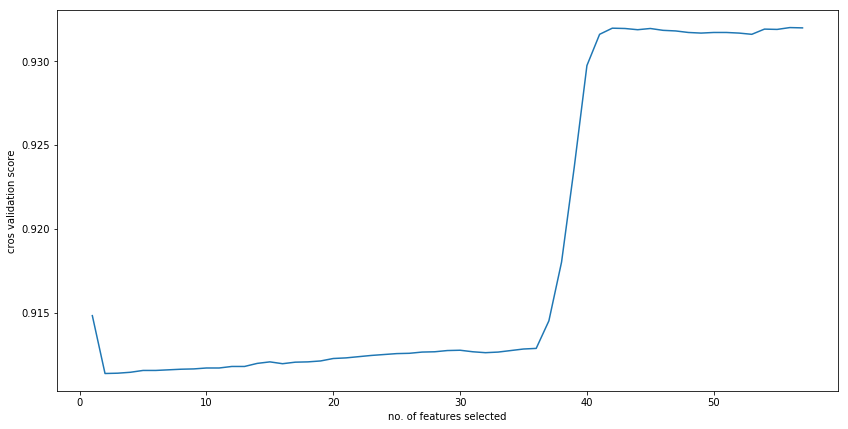

In [101]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X,y)

plt.figure(figsize=(14,7))
plt.xlabel('no. of features selected')
plt.ylabel('cros validation score')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


In [102]:
# As we can 10 features we get high cross vaidation score

selected_features = cols
X = train_file[selected_features]

# Correlation for final selected features
#plt.figure(figsize=(15,8))
#sns.heatmap(X.corr(), annot=True)

In [103]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))


Train/Test split results:
LogisticRegression accuracy is 0.932
LogisticRegression log_loss is 0.198
LogisticRegression auc is 0.878


In [110]:
final_test['is_promoted'] = logreg.predict(final_test[selected_features])
#final_test['employee_id'] = test_df['PassengerId']

submission = final_test[['employee_id','is_promoted']]

submission.to_csv("submission.csv", index=False)

submission.tail()

,employee_id,is_promoted
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0
23489,5973,1
